## Counting reads at preprocessing steps and preparing files for depositing

<div style="text-align: right">
    10.07.2023,
    19.10.2023,
    20.12.2023
    <br>
    Vakil Takhaveev, PhD
</div>

In this notebook, we generate the following figures of the paper:
* Supplementary Fig. 8.

In [1]:
#importing necessary modules
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
import shutil
print(sys.version)

3.8.5 (default, Oct  6 2020, 10:04:29) 
[GCC 6.3.0]


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.default'] = "regular"

matplotlib.rcParams['font.size'] = 16

In [3]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("scipy", scipy.__version__)

numpy 1.19.2
pandas 1.1.3
matplotlib 3.4.2
seaborn 0.11.1
scipy 1.6.3


In [4]:
DF_file_sample = pd.read_csv("/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/File_Sample_table_Paper.csv")

DF_file_sample = DF_file_sample.reset_index(drop = True)
DF_file_sample

File        Sample
0    20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz      Nb.BsrDI
1           o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz    WT 50nM R1
2           o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz    WT 50nM R2
3           o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz    WT 20nM R1
4          o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz    WT 20nM R2
5          o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz     WT 0nM R1
6          o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz     WT 0nM R2
7          o28841113-13_Emma_Vakil_S7_R1_001.fastq.gz    CSB 0nM R2
8          o28841114-14_Emma_Vakil_S8_R1_001.fastq.gz   CSB 20nM R1
9          o28841115-15_Emma_Vakil_S9_R1_001.fastq.gz   CSB 20nM R2
10        o28841116-16_Emma_Vakil_S10_R1_001.fastq.gz   CSB 50nM R1
11        o28841117-17_Emma_Vakil_S11_R1_001.fastq.gz   CSB 50nM R2
12  20221013.B-o296061_09-1_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R1
13  20221013.B-o296061_10-2_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R2
14  20221013.B-o296061_11-3_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R3
15  20221013.B-o296061_12-4_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R1
16  20221013.B-o296061_13-5_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R2
17  20221013.B-o296061_14-6_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R3
18  20221013.B-o296061_15-7_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R1
19  20221013.B-o296061_16-8_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R2
20  20221013.B-o296061_17-9_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R3
21  20221013.B-o296061_18-10_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R1
22  20221013.B-o296061_19-11_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R2
23  20221013.B-o296061_20-12_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R3
24  o304482_01-HAP-1_wt_ET743_2h-1_S12_R1_001.fast...  HAP1 50nM R1
25  o304482_02-HAP-1_wt_ET743_2h-2_S18_R1_001.fast...  HAP1 50nM R2
26  o304482_03-HAP-1_wt_ET743_2h-3_S2_R1_001.fastq.gz  HAP1 50nM R3
27  o304482_04-HAP-1_wt_DMSO_2h-4_S10_R1_001.fastq.gz   HAP1 0nM R1
28  o304482_05-HAP-1_wt_DMSO_2h-5_S13_R1_001.fastq.gz   HAP1 0nM R2
29   o304482_06-HAP-1_wt_DMSO_2h-6_S7_R1_001.fastq.gz   HAP1 0nM R3

### Counting the reads

In [5]:
datasets = ["all_GLOE_seq_samples"]

#Paths to the conversion tables
conv_table_paths = ["/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/File_Sample_table_Paper.csv"]

#Paths to the preprocessing data
PATHs = ["/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/Sample_folders/"]

DF_prepro = pd.DataFrame({})

for d, dataset in enumerate(datasets):
    PATH = PATHs[d]
    conversion_table = pd.read_csv(conv_table_paths[d])
    
    for index, row in conversion_table.iterrows():
        ###!!! Sample name
        i = row["File"]
        sample = row["Sample"]
        print(sample, i)
        tmp = pd.DataFrame({"Sample" : [sample], "File" : [i]})

        
        
        ###!!! Trimming
        file_i = os.path.join(PATH, i, i + '.err')
        file_i = open(file_i, 'r')
        lines = file_i.readlines()
        file_i.close()
        N_input, N_surviving, N_dropped = None, None, None
        c = 0
        for l in lines:
            if l.startswith("Input Reads:"):
                stats = l.strip().split(' ')
                N_input = int(stats[2])
                N_surviving = int(stats[4])
                N_dropped = int(stats[7])
                c += 1
        if c > 1:
            print("Error. Check the err file")
        tmp["N_input"], tmp["N_surviving"], tmp["N_dropped"] = [N_input], [N_surviving], [N_dropped]
        
        
        
        ###!!! UMI assignment from R2
        file_i = os.path.join(PATH, i, i + '.umi_extr.out')
        file_i = open(file_i, 'r')
        lines = file_i.readlines()
        file_i.close()
        N_umi = None
        c = 0
        for l in lines:
            if l.startswith("UMI assigned:"):
                stats = l.strip().split(' ')
                N_umi = int(stats[2])
                c += 1
        if c > 1:
            print("Error. Check the err file")
        tmp["N_umi"] = [N_umi]

                
        
        ###!!! Alignment of UMI-removed barcoded reads
        file_i = os.path.join(PATH, i, i + '.UMIremoved_trimmed_.ALIGN.err')
        file_i = open(file_i, 'r')
        lines = file_i.readlines()
        file_i.close()
        N_unmapped, N_mapped_once, N_mapped_more_than_once = None, None, None
        c = 0
        for l in lines:
            if "aligned 0 times" in l:
                N_unmapped = int(l.strip().split(" ")[0])
                c += 1
            if "aligned exactly 1 time" in l:
                N_mapped_once = int(l.strip().split(" ")[0])
            if "aligned >1 times" in l:
                N_mapped_more_than_once = int(l.strip().split(" ")[0])
        if c > 1:
            print("Error. Check the .UMIremoved_trimmed_.ALIGN.err file")
        tmp["N_unmapped"], tmp["N_mapped_once"], tmp["N_mapped_more_than_once"] = [N_unmapped], [N_mapped_once], [N_mapped_more_than_once]
        tmp["N_mapped"] = tmp["N_mapped_once"] + tmp["N_mapped_more_than_once"]

        
        
        ###!!! UMI-assisted deduplication of UMI-removed reads
        file_i = os.path.join(PATH, i, i + '.UMIremoved_trimmed_.UMIdedupl.out')
        file_i = open(file_i, 'r')
        lines = file_i.readlines()
        file_i.close()
        N_dedupl_positions, N_mean_uniq_UMI, N_max_uniq_UMI, N_dedupl = None, None, None, None
        c = 0
        for l in lines:
            if "INFO Total number of positions deduplicated:" in l:
                N_dedupl_positions = int(l.strip().split(" ")[-1])
                c += 1
            if "INFO Mean number of unique UMIs per position:" in l:
                N_mean_uniq_UMI = float(l.strip().split(" ")[-1])
            if "INFO Max. number of unique UMIs per position:" in l:
                N_max_uniq_UMI = int(l.strip().split(" ")[-1])
            if "INFO Number of reads out:" in l:
                N_dedupl = int(l.strip().split(" ")[-1])
        if c > 1:
            print("Error. Check the .UMIremoved_trimmed_.UMIdedupl.out file")
        tmp["umidedup_N_dedupl_positions"], tmp["umidedup_N_mean_uniq_UMI"] = [N_dedupl_positions], [N_mean_uniq_UMI]
        tmp["umidedup_N_max_uniq_UMI"], tmp["umidedup_N_dedupl"] = [N_max_uniq_UMI], [N_dedupl]
        
        
        
        ###!!! Final DNA break count
        file1 = os.path.join(PATH, i, "bed_and_bedgraph", "UMIdedup_UMIremoved_trimmed_" + i + "GRCh38.p13_ALL_plus_strand.bedgraph")
        file2 = os.path.join(PATH, i, "bed_and_bedgraph", "UMIdedup_UMIremoved_trimmed_" + i + "GRCh38.p13_ALL_minus_strand.bedgraph")

        df1 = pd.read_csv(file1, sep = "\t", header = None, 
                                      names = ["Chr", "Start", "End", "Value", "MAPQ"])
        df2 = pd.read_csv(file2, sep = "\t", header = None, 
                                      names = ["Chr", "Start", "End", "Value", "MAPQ"])

        SD = df1["Value"].sum() + df2["Value"].sum()
        
        tmp["Final_number_of_DNA_breaks"] = [SD]        
        
        
        DF_prepro = DF_prepro.append(tmp)
    
DF_prepro = DF_prepro.sort_values(by = "Sample")
DF_prepro = DF_prepro.reset_index(drop = True)

#OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/"
#DF_prepro.to_csv(OUTPATH + "Read_counts_at_preprocessing_steps_all_samples_MS.csv")
DF_prepro.to_csv("Read_counts_at_preprocessing_steps_all_samples_MS.csv")

DF_prepro

Nb.BsrDI 20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz
WT 50nM R1 o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz
WT 50nM R2 o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz
WT 20nM R1 o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz
WT 20nM R2 o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz
WT 0nM R1 o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz
WT 0nM R2 o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz
CSB 0nM R2 o28841113-13_Emma_Vakil_S7_R1_001.fastq.gz
CSB 20nM R1 o28841114-14_Emma_Vakil_S8_R1_001.fastq.gz
CSB 20nM R2 o28841115-15_Emma_Vakil_S9_R1_001.fastq.gz
CSB 50nM R1 o28841116-16_Emma_Vakil_S10_R1_001.fastq.gz
CSB 50nM R2 o28841117-17_Emma_Vakil_S11_R1_001.fastq.gz
XPC 50nM R1 20221013.B-o296061_09-1_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC 50nM R2 20221013.B-o296061_10-2_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC 50nM R3 20221013.B-o296061_11-3_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC 0nM R1 20221013.B-o296061_12-4_U2OS_XPC_ko_DMSO_R1.fastq.gz
XPC 0nM R2 20221013.B-o296061_13-5_U2OS_XPC_ko_DMSO_R1.fastq.gz
XPC 0n

Sample                                               File   N_input  \
0     CSB 0nM R2         o28841113-13_Emma_Vakil_S7_R1_001.fastq.gz  26244101   
1    CSB 20nM R1         o28841114-14_Emma_Vakil_S8_R1_001.fastq.gz  39392062   
2    CSB 20nM R2         o28841115-15_Emma_Vakil_S9_R1_001.fastq.gz   5640421   
3    CSB 50nM R1        o28841116-16_Emma_Vakil_S10_R1_001.fastq.gz  26035749   
4    CSB 50nM R2        o28841117-17_Emma_Vakil_S11_R1_001.fastq.gz  24580667   
5    HAP1 0nM R1  o304482_04-HAP-1_wt_DMSO_2h-4_S10_R1_001.fastq.gz  17294837   
6    HAP1 0nM R2  o304482_05-HAP-1_wt_DMSO_2h-5_S13_R1_001.fastq.gz  22494920   
7    HAP1 0nM R3   o304482_06-HAP-1_wt_DMSO_2h-6_S7_R1_001.fastq.gz  24819648   
8   HAP1 50nM R1  o304482_01-HAP-1_wt_ET743_2h-1_S12_R1_001.fast...  12330003   
9   HAP1 50nM R2  o304482_02-HAP-1_wt_ET743_2h-2_S18_R1_001.fast...  15299378   
10  HAP1 50nM R3  o304482_03-HAP-1_wt_ET743_2h-3_S2_R1_001.fastq.gz  16725146   
11      Nb.BsrDI   20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz  53283342   
12     WT 0nM R1         o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz  36171881   
13     WT 0nM R2         o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz  42633954   
14    WT 20nM R1          o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz   3538327   
15    WT 20nM R2         o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz  30415904   
16    WT 50nM R1          o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz  25955953   
17    WT 50nM R2          o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz  30512394   
18    XPA 0nM R1  20221013.B-o296061_18-10_U2OS_XPA_ko_DMSO_R1.f...  17596211   
19    XPA 0nM R2  20221013.B-o296061_19-11_U2OS_XPA_ko_DMSO_R1.f...  19376521   
20    XPA 0nM R3  20221013.B-o296061_20-12_U2OS_XPA_ko_DMSO_R1.f...  26675191   
21   XPA 50nM R1  20221013.B-o296061_15-7_U2OS_XPA_ko_50nM_ET743...  24227550   
22   XPA 50nM R2  20221013.B-o296061_16-8_U2OS_XPA_ko_50nM_ET743...  27026750   
23   XPA 50nM R3  20221013.B-o296061_17-9_U2OS_XPA_ko_50nM_ET743...  21967552   
24    XPC 0nM R1  20221013.B-o296061_12-4_U2OS_XPC_ko_DMSO_R1.fa...  16076444   
25    XPC 0nM R2  20221013.B-o296061_13-5_U2OS_XPC_ko_DMSO_R1.fa...  18301309   
26    XPC 0nM R3  20221013.B-o296061_14-6_U2OS_XPC_ko_DMSO_R1.fa...  20738489   
27   XPC 50nM R1  20221013.B-o296061_09-1_U2OS_XPC_ko_50nM_ET743...  22102188   
28   XPC 50nM R2  20221013.B-o296061_10-2_U2OS_XPC_ko_50nM_ET743...  26360622   
29   XPC 50nM R3  20221013.B-o296061_11-3_U2OS_XPC_ko_50nM_ET743...  19140183   

    N_surviving  N_dropped     N_umi  N_unmapped  N_mapped_once  \
0      15615872   10628229  15327438      485519       10130601   
1      24470544   14921518  24007303     1216539       15007069   
2       5066571     573850   4971385      100296        3633651   
3      15287408   10748341  14985836      248098       10272245   
4      12022169   12558498  11801023      590504        7701184   
5      14677639    2617198  13935038      647686        8076282   
6      19101158    3393762  18181087      602141       10720640   
7      20733723    4085925  19660899      602487       12157063   
8      10538673    1791330  10030616      296923        6229898   
9      12941771    2357607  12306500      291672        7785028   
10     14256379    2468767  13511731      304596        8238937   
11     44889837    8393505  43951081     2368702       28118209   
12     21234975   14936906  20761470      370301       14746929   
13     26510419   16123535  25897495      414772       18158315   
14      3162639     375688   3089020       35933        2330494   
15     19738767   10677137  19273366      321952       13648839   
16     16792585    9163368  16405409      257252       11980758   
17     18932607   11579787  18485837      357633       12951499   
18     15302460    2293751  14982798      469579        9958660   
19     13716855    5659666  13378735      256930        8764342   
20     23533680    3141511  23047945      476451       15405538   
21     21775867    24516

In [5]:
DF_prepro = pd.read_csv("Read_counts_at_preprocessing_steps_all_samples_MS.csv", index_col = 0)
DF_prepro

Sample                                               File   N_input  \
0     CSB 0nM R2         o28841113-13_Emma_Vakil_S7_R1_001.fastq.gz  26244101   
1    CSB 20nM R1         o28841114-14_Emma_Vakil_S8_R1_001.fastq.gz  39392062   
2    CSB 20nM R2         o28841115-15_Emma_Vakil_S9_R1_001.fastq.gz   5640421   
3    CSB 50nM R1        o28841116-16_Emma_Vakil_S10_R1_001.fastq.gz  26035749   
4    CSB 50nM R2        o28841117-17_Emma_Vakil_S11_R1_001.fastq.gz  24580667   
5    HAP1 0nM R1  o304482_04-HAP-1_wt_DMSO_2h-4_S10_R1_001.fastq.gz  17294837   
6    HAP1 0nM R2  o304482_05-HAP-1_wt_DMSO_2h-5_S13_R1_001.fastq.gz  22494920   
7    HAP1 0nM R3   o304482_06-HAP-1_wt_DMSO_2h-6_S7_R1_001.fastq.gz  24819648   
8   HAP1 50nM R1  o304482_01-HAP-1_wt_ET743_2h-1_S12_R1_001.fast...  12330003   
9   HAP1 50nM R2  o304482_02-HAP-1_wt_ET743_2h-2_S18_R1_001.fast...  15299378   
10  HAP1 50nM R3  o304482_03-HAP-1_wt_ET743_2h-3_S2_R1_001.fastq.gz  16725146   
11      Nb.BsrDI   20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz  53283342   
12     WT 0nM R1         o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz  36171881   
13     WT 0nM R2         o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz  42633954   
14    WT 20nM R1          o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz   3538327   
15    WT 20nM R2         o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz  30415904   
16    WT 50nM R1          o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz  25955953   
17    WT 50nM R2          o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz  30512394   
18    XPA 0nM R1  20221013.B-o296061_18-10_U2OS_XPA_ko_DMSO_R1.f...  17596211   
19    XPA 0nM R2  20221013.B-o296061_19-11_U2OS_XPA_ko_DMSO_R1.f...  19376521   
20    XPA 0nM R3  20221013.B-o296061_20-12_U2OS_XPA_ko_DMSO_R1.f...  26675191   
21   XPA 50nM R1  20221013.B-o296061_15-7_U2OS_XPA_ko_50nM_ET743...  24227550   
22   XPA 50nM R2  20221013.B-o296061_16-8_U2OS_XPA_ko_50nM_ET743...  27026750   
23   XPA 50nM R3  20221013.B-o296061_17-9_U2OS_XPA_ko_50nM_ET743...  21967552   
24    XPC 0nM R1  20221013.B-o296061_12-4_U2OS_XPC_ko_DMSO_R1.fa...  16076444   
25    XPC 0nM R2  20221013.B-o296061_13-5_U2OS_XPC_ko_DMSO_R1.fa...  18301309   
26    XPC 0nM R3  20221013.B-o296061_14-6_U2OS_XPC_ko_DMSO_R1.fa...  20738489   
27   XPC 50nM R1  20221013.B-o296061_09-1_U2OS_XPC_ko_50nM_ET743...  22102188   
28   XPC 50nM R2  20221013.B-o296061_10-2_U2OS_XPC_ko_50nM_ET743...  26360622   
29   XPC 50nM R3  20221013.B-o296061_11-3_U2OS_XPC_ko_50nM_ET743...  19140183   

    N_surviving  N_dropped     N_umi  N_unmapped  N_mapped_once  \
0      15615872   10628229  15327438      485519       10130601   
1      24470544   14921518  24007303     1216539       15007069   
2       5066571     573850   4971385      100296        3633651   
3      15287408   10748341  14985836      248098       10272245   
4      12022169   12558498  11801023      590504        7701184   
5      14677639    2617198  13935038      647686        8076282   
6      19101158    3393762  18181087      602141       10720640   
7      20733723    4085925  19660899      602487       12157063   
8      10538673    1791330  10030616      296923        6229898   
9      12941771    2357607  12306500      291672        7785028   
10     14256379    2468767  13511731      304596        8238937   
11     44889837    8393505  43951081     2368702       28118209   
12     21234975   14936906  20761470      370301       14746929   
13     26510419   16123535  25897495      414772       18158315   
14      3162639     375688   3089020       35933        2330494   
15     19738767   10677137  19273366      321952       13648839   
16     16792585    9163368  16405409      257252       11980758   
17     18932607   11579787  18485837      357633       12951499   
18     15302460    2293751  14982798      469579        9958660   
19     13716855    5659666  13378735      256930        8764342   
20     23533680    3141511  23047945      476451       15405538   
21     21775867    24516

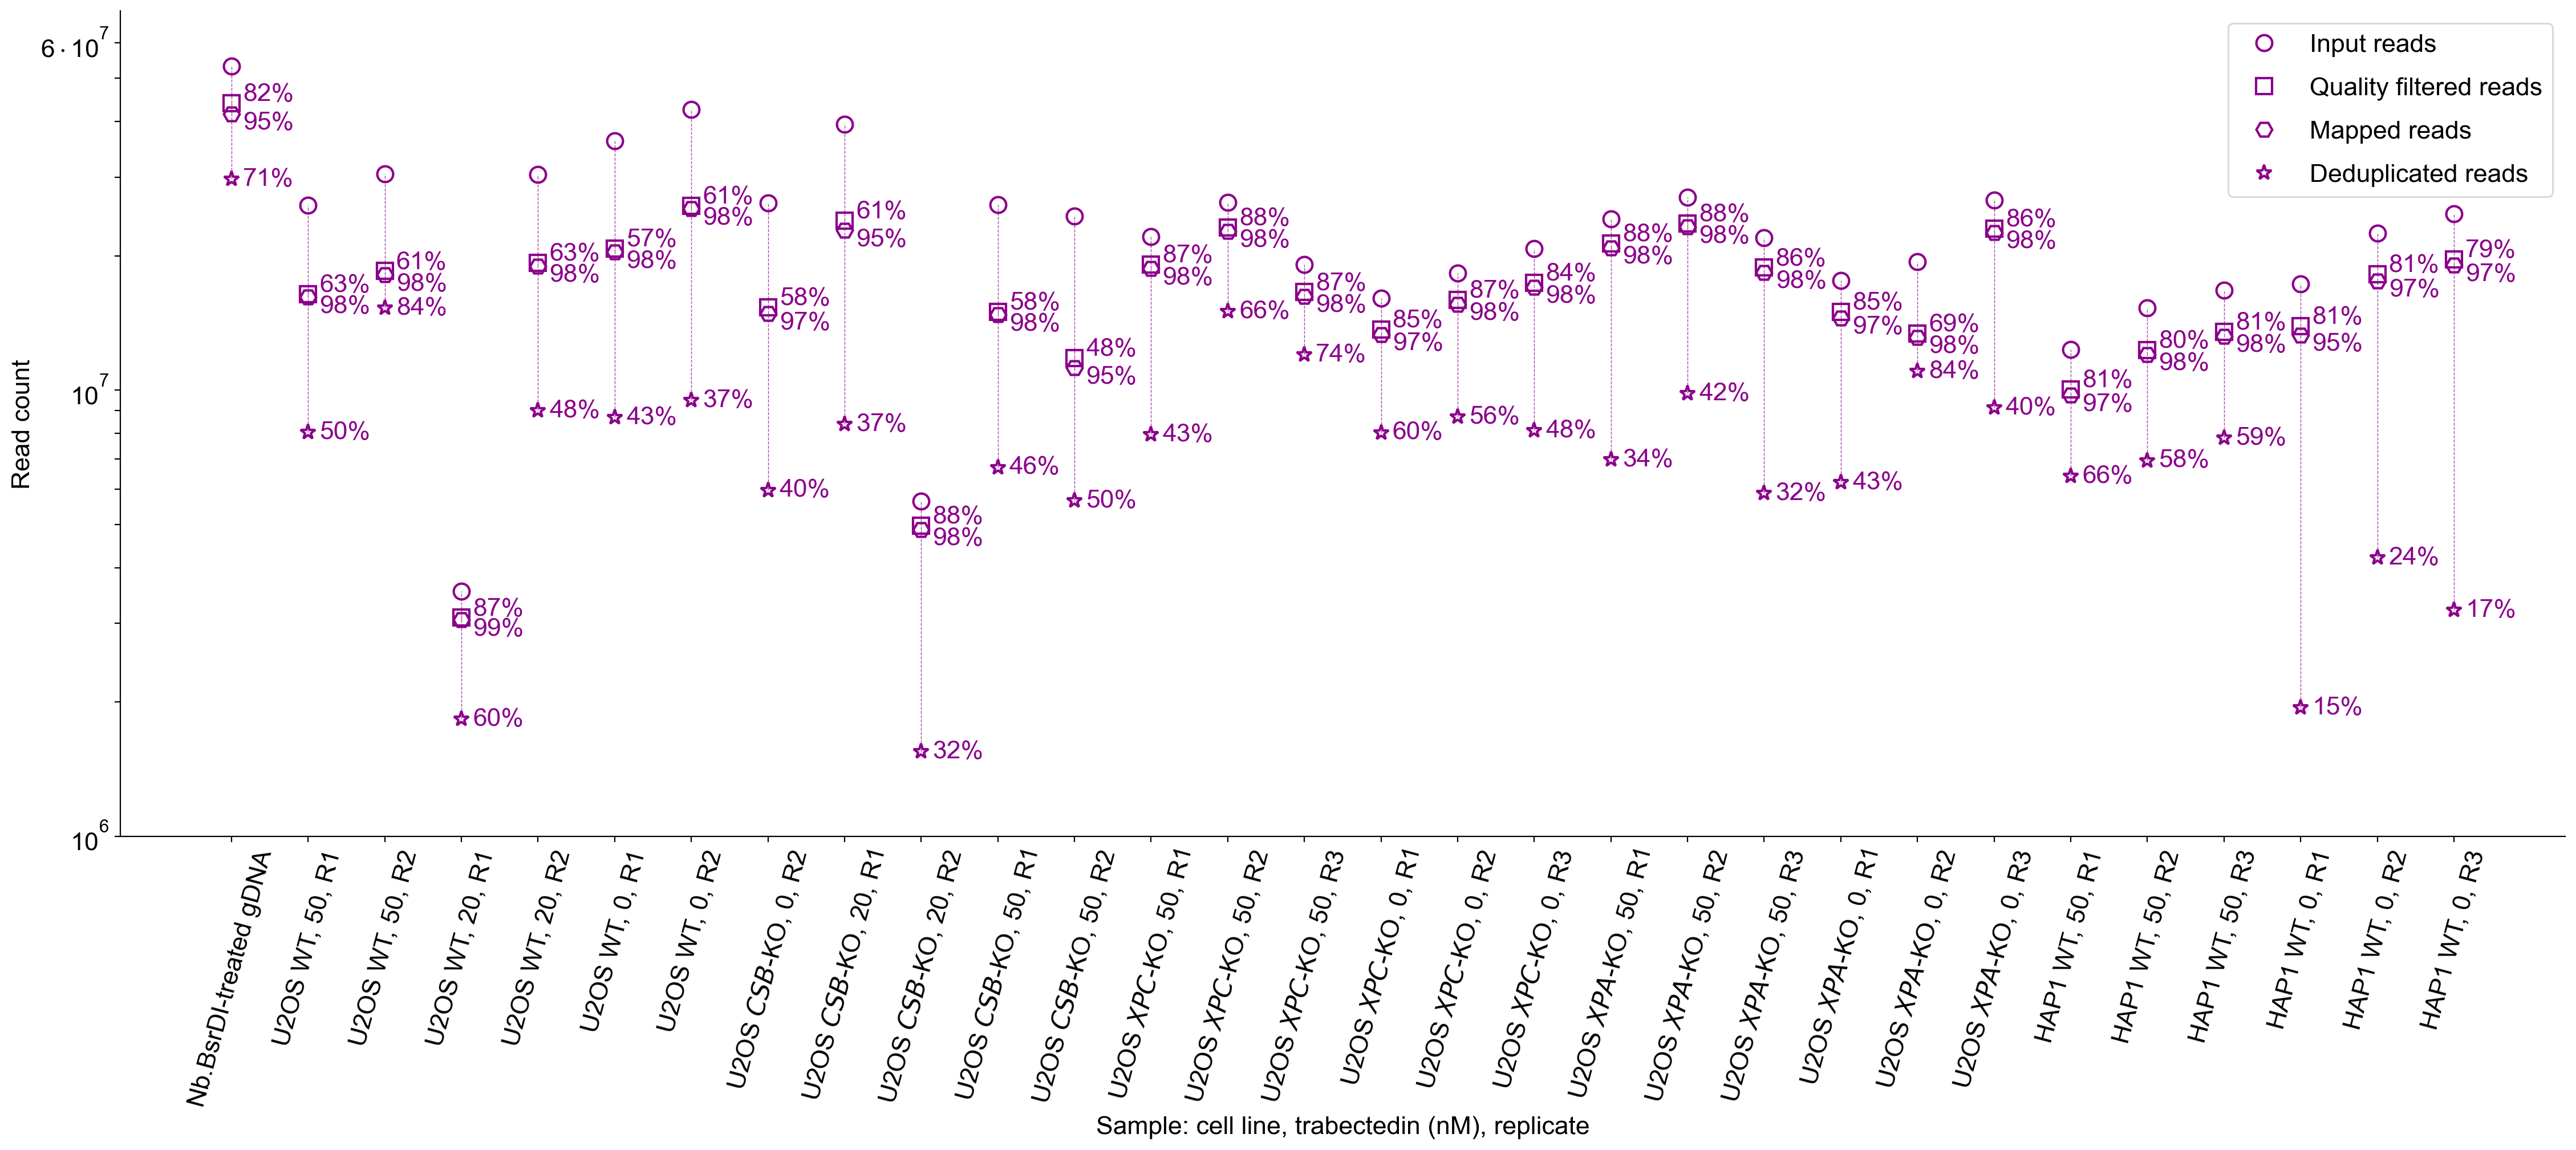

In [6]:
ticklable_list = ['Nb.BsrDI-treated gDNA',
 'U2OS WT, 50, R1',
 'U2OS WT, 50, R2',
 'U2OS WT, 20, R1',
 'U2OS WT, 20, R2',
 'U2OS WT, 0, R1',
 'U2OS WT, 0, R2',
 'U2OS $\it{CSB}$-KO, 0, R2',
 'U2OS $\it{CSB}$-KO, 20, R1',
 'U2OS $\it{CSB}$-KO, 20, R2',
 'U2OS $\it{CSB}$-KO, 50, R1',
 'U2OS $\it{CSB}$-KO, 50, R2',
 'U2OS $\it{XPC}$-KO, 50, R1',
 'U2OS $\it{XPC}$-KO, 50, R2',
 'U2OS $\it{XPC}$-KO, 50, R3',
 'U2OS $\it{XPC}$-KO, 0, R1',
 'U2OS $\it{XPC}$-KO, 0, R2',
 'U2OS $\it{XPC}$-KO, 0, R3',
 'U2OS $\it{XPA}$-KO, 50, R1',
 'U2OS $\it{XPA}$-KO, 50, R2',
 'U2OS $\it{XPA}$-KO, 50, R3',
 'U2OS $\it{XPA}$-KO, 0, R1',
 'U2OS $\it{XPA}$-KO, 0, R2',
 'U2OS $\it{XPA}$-KO, 0, R3',
 'HAP1 WT, 50, R1',
 'HAP1 WT, 50, R2',
 'HAP1 WT, 50, R3',
 'HAP1 WT, 0, R1',
 'HAP1 WT, 0, R2',
 'HAP1 WT, 0, R3']


fig = plt.figure(1, (5*4.5, 5*2), dpi = 200)
ax = plt.subplot(1, 1, 1)

labels = ["Input reads", "Quality filtered reads", "Mapped reads", "Deduplicated reads"]
variables = ["N_input", "N_umi", "N_mapped", "umidedup_N_dedupl"]

colors = ["darkmagenta", "darkmagenta", "darkmagenta", "darkmagenta"]
markers = ["o", "s", "H", "*"]

pcydeltas = [0, 0.02, -0.02, 0]

parent_hash = {
    "N_umi" : "N_input", "N_mapped" : "N_umi",
    "umidedup_N_dedupl" : "N_mapped"}

samples = DF_file_sample["Sample"].tolist()

tick_list = []

for index, i in enumerate(samples):
    tmp = DF_prepro[DF_prepro["Sample"] == i]
    
    for v, var in enumerate(variables):
        N = float(tmp[var])
        N_log = np.log10(N)
        X = index
        
        label = None
        if index == 0:
                label = labels[v]
        ax.plot([X], [N_log], marker = markers[v], markeredgecolor = colors[v], markerfacecolor = "None", markersize = 10,
                markeredgewidth = 1.5, label = label, lw = 0)
        
        if var != "N_input":
            Nprev = float(tmp[parent_hash[var]])
            Nprev_log = np.log10(Nprev)
            
            ax.plot([X, X], [N_log, Nprev_log], color = colors[v], linewidth = 0.5,
                        ls = "dashed", alpha = 0.75)
            
            pc = int(round(100*(N)/Nprev, 0))
            ax.text(X + 0.15, N_log + pcydeltas[v], str(pc) + "%", fontsize = "medium", ha = "left", 
                        va = "center", color = colors[v])
            
    tick_list.append(index)
        
plt.legend(fontsize = "medium", frameon = True, labelspacing = 0.8)

ax.set_xticks(tick_list)
ax.set_xticklabels(ticklable_list, rotation = 75, ha = "center")

#plt.xlim(-0.4, 2.6)
plt.ylim(6, 7.85)
ax.set_yticks([np.log10(10**6), np.log10(2*10**6), np.log10(3*10**6), np.log10(4*10**6), np.log10(5*10**6), np.log10(6*10**6),
               np.log10(7*10**6), np.log10(8*10**6), np.log10(9*10**6),
               np.log10(10**7), np.log10(2*10**7), np.log10(3*10**7), np.log10(4*10**7), 
                np.log10(5*10**7), np.log10(6*10**7)])
ax.set_yticklabels([r'$10^6$', "", "", "", "", "", 
                    "", "", "", 
                    r'$10^7$', "", "", "", 
                    "", r'$6\cdot10^7$'])


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Sample: cell line, trabectedin (nM), replicate")
plt.ylabel('Read count')

plt.tight_layout(pad=0.25)

plt.savefig("../DamageSeqAnalysis/GLOEseq/GLOEseq_MayJulyOct2022_Jan2023/MS_FIGURES/Preprocessing_stats_GLOEseq_all_samples.pdf")


In [7]:
np.mean(DF_prepro["N_mapped"]/DF_prepro["N_umi"])

0.9740360611630744

In [8]:
handle = pd.DataFrame({})

for index, i in enumerate(samples):
    print(i, "-", ticklable_list[index])
    
    tmp = DF_prepro[DF_prepro["Sample"] == i].copy()
    tmp = tmp.loc[:, variables].copy()
    tmp.columns = labels
    tmp.loc[:, "Sample"] = ticklable_list[index].replace("$\it{", "").replace("}$", "")
    
    handle = pd.concat([handle, tmp])

handle = handle.reset_index(drop = True)

OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/SOURCE_DATA/csv_files/"
handle.to_csv(OUTPATH + "Source_data_FigS8.csv", index = False)
handle

Nb.BsrDI - Nb.BsrDI-treated gDNA
WT 50nM R1 - U2OS WT, 50, R1
WT 50nM R2 - U2OS WT, 50, R2
WT 20nM R1 - U2OS WT, 20, R1
WT 20nM R2 - U2OS WT, 20, R2
WT 0nM R1 - U2OS WT, 0, R1
WT 0nM R2 - U2OS WT, 0, R2
CSB 0nM R2 - U2OS $\it{CSB}$-KO, 0, R2
CSB 20nM R1 - U2OS $\it{CSB}$-KO, 20, R1
CSB 20nM R2 - U2OS $\it{CSB}$-KO, 20, R2
CSB 50nM R1 - U2OS $\it{CSB}$-KO, 50, R1
CSB 50nM R2 - U2OS $\it{CSB}$-KO, 50, R2
XPC 50nM R1 - U2OS $\it{XPC}$-KO, 50, R1
XPC 50nM R2 - U2OS $\it{XPC}$-KO, 50, R2
XPC 50nM R3 - U2OS $\it{XPC}$-KO, 50, R3
XPC 0nM R1 - U2OS $\it{XPC}$-KO, 0, R1
XPC 0nM R2 - U2OS $\it{XPC}$-KO, 0, R2
XPC 0nM R3 - U2OS $\it{XPC}$-KO, 0, R3
XPA 50nM R1 - U2OS $\it{XPA}$-KO, 50, R1
XPA 50nM R2 - U2OS $\it{XPA}$-KO, 50, R2
XPA 50nM R3 - U2OS $\it{XPA}$-KO, 50, R3
XPA 0nM R1 - U2OS $\it{XPA}$-KO, 0, R1
XPA 0nM R2 - U2OS $\it{XPA}$-KO, 0, R2
XPA 0nM R3 - U2OS $\it{XPA}$-KO, 0, R3
HAP1 50nM R1 - HAP1 WT, 50, R1
HAP1 50nM R2 - HAP1 WT, 50, R2
HAP1 50nM R3 - HAP1 WT, 50, R3
HAP1 0nM R1 - HAP1 WT

Input reads  Quality filtered reads  Mapped reads  Deduplicated reads  \
0      53283342                43951081      41582379            29721654   
1      25955953                16405409      16148157             8048741   
2      30512394                18485837      18128204            15283166   
3       3538327                 3089020       3053087             1829206   
4      30415904                19273366      18951414             9007140   
5      36171881                20761470      20391169             8683703   
6      42633954                25897495      25482723             9487319   
7      26244101                15327438      14841919             5967978   
8      39392062                24007303      22790764             8377247   
9       5640421                 4971385       4871089             1546908   
10     26035749                14985836      14737738             6714439   
11     24580667                11801023      11210519             5651753   
12     22102188                19141008      18713555             7959777   
13     26360622                23127940      22699230            15004217   
14     19140183                16578154      16232952            12000394   
15     16076444                13666927      13316762             8035146   
16     18301309                15953420      15569322             8705909   
17     20738489                17409618      17003729             8121752   
18     24227550                21316117      20824383             6981663   
19     27026750                23665934      23206010             9839491   
20     21967552                18816692      18361724             5871955   
21     17596211                14982798      14513219             6211647   
22     19376521                13378735      13121805            11033565   
23     26675191                23047945      22571494             9133409   
24     12330003                10030616       9733693             6416181   
25     15299378                12306500      12014828             6957251   
26     16725146                13511731      13207135             7820135   
27     17294837                13935038      13287352             1940181   
28     22494920                18181087      17578946             4207371   
29     24819648                19660899      19058412             3211520   

                   Sample  
0   Nb.BsrDI-treated gDNA  
1         U2OS WT, 50, R1  
2         U2OS WT, 50, R2  
3         U2OS WT, 20, R1  
4         U2OS WT, 20, R2  
5          U2OS WT, 0, R1  
6          U2OS WT, 0, R2  
7      U2OS CSB-KO, 0, R2  
8     U2OS CSB-KO, 20, R1  
9     U2OS CSB-KO, 20, R2  
10    U2OS CSB-KO, 50, R1  
11    U2OS CSB-KO, 50, R2  
12    U2OS XPC-KO, 50, R1  
13    U2OS XPC-KO, 50, R2  
14    U2OS XPC-KO, 50, R3  
15     U2OS XPC-KO, 0, R1  
16     U2OS XPC-KO, 0, R2  
17     U2OS XPC-KO, 0, R3  
18    U2OS XPA-KO, 50, R1  
19    U2OS XPA-KO, 50, R2  
20    U2OS XPA-KO, 50, R3  
21     U2OS XPA-KO, 0, R1  
22     U2OS XPA-KO, 0, R2  
23     U2OS XPA-KO, 0, R3  
24        HAP1 WT, 50, R1  
25        HAP1 WT, 50, R2  
26        HAP1 WT, 50, R3  
27         HAP1 WT, 0, R1  
28         HAP1 WT, 0, R2  
29         HAP1 WT, 0, R3

### Preparing TSV files for depositing

In [5]:
DF_file_sample = pd.read_csv("/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/File_Sample_table_Paper.csv")

DF_file_sample = DF_file_sample.reset_index(drop = True)
DF_file_sample

File        Sample
0    20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz      Nb.BsrDI
1           o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz    WT 50nM R1
2           o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz    WT 50nM R2
3           o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz    WT 20nM R1
4          o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz    WT 20nM R2
5          o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz     WT 0nM R1
6          o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz     WT 0nM R2
7          o28841113-13_Emma_Vakil_S7_R1_001.fastq.gz    CSB 0nM R2
8          o28841114-14_Emma_Vakil_S8_R1_001.fastq.gz   CSB 20nM R1
9          o28841115-15_Emma_Vakil_S9_R1_001.fastq.gz   CSB 20nM R2
10        o28841116-16_Emma_Vakil_S10_R1_001.fastq.gz   CSB 50nM R1
11        o28841117-17_Emma_Vakil_S11_R1_001.fastq.gz   CSB 50nM R2
12  20221013.B-o296061_09-1_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R1
13  20221013.B-o296061_10-2_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R2
14  20221013.B-o296061_11-3_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R3
15  20221013.B-o296061_12-4_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R1
16  20221013.B-o296061_13-5_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R2
17  20221013.B-o296061_14-6_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R3
18  20221013.B-o296061_15-7_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R1
19  20221013.B-o296061_16-8_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R2
20  20221013.B-o296061_17-9_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R3
21  20221013.B-o296061_18-10_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R1
22  20221013.B-o296061_19-11_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R2
23  20221013.B-o296061_20-12_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R3
24  o304482_01-HAP-1_wt_ET743_2h-1_S12_R1_001.fast...  HAP1 50nM R1
25  o304482_02-HAP-1_wt_ET743_2h-2_S18_R1_001.fast...  HAP1 50nM R2
26  o304482_03-HAP-1_wt_ET743_2h-3_S2_R1_001.fastq.gz  HAP1 50nM R3
27  o304482_04-HAP-1_wt_DMSO_2h-4_S10_R1_001.fastq.gz   HAP1 0nM R1
28  o304482_05-HAP-1_wt_DMSO_2h-5_S13_R1_001.fastq.gz   HAP1 0nM R2
29   o304482_06-HAP-1_wt_DMSO_2h-6_S7_R1_001.fastq.gz   HAP1 0nM R3

In [6]:
PATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/Sample_folders/"
OUTPUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/Submitting_data_to_GEO/processed_files/"


for index, row in DF_file_sample.iterrows():
    ###!!! Sample name
    i = row["File"]
    sample = row["Sample"]
    print(sample, i)
    
    
    file1 = os.path.join(PATH, i, "bed_and_bedgraph", "UMIdedup_UMIremoved_trimmed_" + i + "GRCh38.p13_ALL_plus_strand.bedgraph")
    file2 = os.path.join(PATH, i, "bed_and_bedgraph", "UMIdedup_UMIremoved_trimmed_" + i + "GRCh38.p13_ALL_minus_strand.bedgraph")

    df1 = pd.read_csv(file1, sep = "\t", header = None, 
                                      names = ["Chr", "Start", "End", "Value", "MAPQ"])
    df1.loc[:, "Strand"] = "+"
    
    df2 = pd.read_csv(file2, sep = "\t", header = None, 
                                      names = ["Chr", "Start", "End", "Value", "MAPQ"])
    df2.loc[:, "Strand"] = "-"
    
    df = pd.concat([df1, df2])
    df = df.reset_index(drop = True)
    
    df = df.loc[:, ["Chr", "Start", "Strand", "MAPQ"]]
    
    #df.to_csv(OUTPUTPATH + sample.replace(" ", "_") + ".tsv", index = False, header = False, sep = "\t")


Nb.BsrDI 20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz
WT 50nM R1 o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz
WT 50nM R2 o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz
WT 20nM R1 o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz
WT 20nM R2 o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz
WT 0nM R1 o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz
WT 0nM R2 o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz
CSB 0nM R2 o28841113-13_Emma_Vakil_S7_R1_001.fastq.gz
CSB 20nM R1 o28841114-14_Emma_Vakil_S8_R1_001.fastq.gz
CSB 20nM R2 o28841115-15_Emma_Vakil_S9_R1_001.fastq.gz
CSB 50nM R1 o28841116-16_Emma_Vakil_S10_R1_001.fastq.gz
CSB 50nM R2 o28841117-17_Emma_Vakil_S11_R1_001.fastq.gz
XPC 50nM R1 20221013.B-o296061_09-1_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC 50nM R2 20221013.B-o296061_10-2_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC 50nM R3 20221013.B-o296061_11-3_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC 0nM R1 20221013.B-o296061_12-4_U2OS_XPC_ko_DMSO_R1.fastq.gz
XPC 0nM R2 20221013.B-o296061_13-5_U2OS_XPC_ko_DMSO_R1.fastq.gz
XPC 0n

In [7]:
DF_SAMPLES = pd.DataFrame({})

for index, row in DF_file_sample.iterrows():
    ###!!! library name
    i = row["File"]
    sample = row["Sample"].replace(" ", "_")
    sample_list = sample.split("_")
    print(sample, i)
    
    tmp = pd.DataFrame({})
    tmp.loc[:, "library name"] = [sample]
    
    ###!!! title
    title = ""
    genotype = ""
    treatment = ""
    
    if sample == "Nb.BsrDI":
        title = "U2OS WT gDNA treated with Nb.BsrDI endonuclease"
        genotype = "wild type"
        treatment = "Nb.BsrDI endonuclease"
        
    if sample_list[0] == "WT":
        title = "WT U2OS cells exposed to " + sample_list[1].replace("nM", " nM") + " trabectedin, biological replicate" + sample_list[2]
        genotype = "wild type"
        treatment = sample_list[1].replace("nM", " nM") + " trabectedin"
        
    if sample_list[0] in ["XPC", "XPA", "CSB"]:
        title = sample_list[0] + " knockout U2OS cells exposed to " + sample_list[1].replace("nM", " nM") + " trabectedin, biological replicate" + sample_list[2]
        genotype = sample_list[0] + " knockout"
        treatment = sample_list[1].replace("nM", " nM") + " trabectedin"

    if sample_list[0] == "HAP1":
        title = "WT HAP1 cells exposed to " + sample_list[1].replace("nM", " nM") + " trabectedin, biological replicate" + sample_list[2]
        genotype = "wild type"
        treatment = sample_list[1].replace("nM", " nM") + " trabectedin"
    
    tmp.loc[:, "title"] = title
    
    ###!!! organism
    tmp.loc[:, "organism"] = ["Homo sapiens"]
    ###!!! tissue
    tmp.loc[:, "tissue"] = [""]
    ###!!! cell line
    cell_line = "U2OS"
    if sample_list[0] == "HAP1":
        cell_line = "HAP1"
    tmp.loc[:, "cell line"] = [cell_line]
    ###!!! cell type
    tmp.loc[:, "cell type"] = [""]
    ###!!! genotype
    tmp.loc[:, "genotype"] = [genotype]
    ###!!! treatment
    tmp.loc[:, "treatment"] = [treatment]
    ###!!! molecule
    tmp.loc[:, "molecule"] = ["genomic DNA"]
    ###!!! single or paired-end
    tmp.loc[:, "single or paired-end"] = ["paired-end"]
    ###!!! instrument model
    tmp.loc[:, "instrument model"] = ["Illumina NovaSeq 6000"]
    ###!!! description
    tmp.loc[:, "description"] = [""]
    
    ###!!! processed data file
    tmp.loc[:, "processed data file"] = [sample + ".tsv"]
    ###!!! processed data file2
    tmp.loc[:, "processed data file2"] = [""]
   
    ###!!! raw file
    tmp.loc[:, "raw file"] = [sample + "__R1.fastq.gz"]
    ###!!! raw file2
    tmp.loc[:, "raw file2"] = [sample + "__R2.fastq.gz"]
    ###!!! raw file3
    tmp.loc[:, "raw file3"] = [""]
    ###!!! raw file4
    tmp.loc[:, "raw file4"] = [""]
    
    DF_SAMPLES = pd.concat([DF_SAMPLES, tmp])
    
DF_SAMPLES = DF_SAMPLES.reset_index(drop = True)

#DF_SAMPLES.to_csv("for_GEO_table.csv", index = False, sep = "\t")
    
    
    

    

Nb.BsrDI 20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz
WT_50nM_R1 o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz
WT_50nM_R2 o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz
WT_20nM_R1 o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz
WT_20nM_R2 o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz
WT_0nM_R1 o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz
WT_0nM_R2 o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz
CSB_0nM_R2 o28841113-13_Emma_Vakil_S7_R1_001.fastq.gz
CSB_20nM_R1 o28841114-14_Emma_Vakil_S8_R1_001.fastq.gz
CSB_20nM_R2 o28841115-15_Emma_Vakil_S9_R1_001.fastq.gz
CSB_50nM_R1 o28841116-16_Emma_Vakil_S10_R1_001.fastq.gz
CSB_50nM_R2 o28841117-17_Emma_Vakil_S11_R1_001.fastq.gz
XPC_50nM_R1 20221013.B-o296061_09-1_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC_50nM_R2 20221013.B-o296061_10-2_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC_50nM_R3 20221013.B-o296061_11-3_U2OS_XPC_ko_50nM_ET743_R1.fastq.gz
XPC_0nM_R1 20221013.B-o296061_12-4_U2OS_XPC_ko_DMSO_R1.fastq.gz
XPC_0nM_R2 20221013.B-o296061_13-5_U2OS_XPC_ko_DMSO_R1.fastq.gz
XPC_0n

In [8]:
DF_SAMPLES

library name                                              title  \
0       Nb.BsrDI    U2OS WT gDNA treated with Nb.BsrDI endonuclease   
1     WT_50nM_R1  WT U2OS cells exposed to 50 nM trabectedin, bi...   
2     WT_50nM_R2  WT U2OS cells exposed to 50 nM trabectedin, bi...   
3     WT_20nM_R1  WT U2OS cells exposed to 20 nM trabectedin, bi...   
4     WT_20nM_R2  WT U2OS cells exposed to 20 nM trabectedin, bi...   
5      WT_0nM_R1  WT U2OS cells exposed to 0 nM trabectedin, bio...   
6      WT_0nM_R2  WT U2OS cells exposed to 0 nM trabectedin, bio...   
7     CSB_0nM_R2  CSB knockout U2OS cells exposed to 0 nM trabec...   
8    CSB_20nM_R1  CSB knockout U2OS cells exposed to 20 nM trabe...   
9    CSB_20nM_R2  CSB knockout U2OS cells exposed to 20 nM trabe...   
10   CSB_50nM_R1  CSB knockout U2OS cells exposed to 50 nM trabe...   
11   CSB_50nM_R2  CSB knockout U2OS cells exposed to 50 nM trabe...   
12   XPC_50nM_R1  XPC knockout U2OS cells exposed to 50 nM trabe...   
13   XPC_50nM_R2  XPC knockout U2OS cells exposed to 50 nM trabe...   
14   XPC_50nM_R3  XPC knockout U2OS cells exposed to 50 nM trabe...   
15    XPC_0nM_R1  XPC knockout U2OS cells exposed to 0 nM trabec...   
16    XPC_0nM_R2  XPC knockout U2OS cells exposed to 0 nM trabec...   
17    XPC_0nM_R3  XPC knockout U2OS cells exposed to 0 nM trabec...   
18   XPA_50nM_R1  XPA knockout U2OS cells exposed to 50 nM trabe...   
19   XPA_50nM_R2  XPA knockout U2OS cells exposed to 50 nM trabe...   
20   XPA_50nM_R3  XPA knockout U2OS cells exposed to 50 nM trabe...   
21    XPA_0nM_R1  XPA knockout U2OS cells exposed to 0 nM trabec...   
22    XPA_0nM_R2  XPA knockout U2OS cells exposed to 0 nM trabec...   
23    XPA_0nM_R3  XPA knockout U2OS cells exposed to 0 nM trabec...   
24  HAP1_50nM_R1  WT HAP1 cells exposed to 50 nM trabectedin, bi...   
25  HAP1_50nM_R2  WT HAP1 cells exposed to 50 nM trabectedin, bi...   
26  HAP1_50nM_R3  WT HAP1 cells exposed to 50 nM trabectedin, bi...   
27   HAP1_0nM_R1  WT HAP1 cells exposed to 0 nM trabectedin, bio...   
28   HAP1_0nM_R2  WT HAP1 cells exposed to 0 nM trabectedin, bio...   
29   HAP1_0nM_R3  WT HAP1 cells exposed to 0 nM trabectedin, bio...   

        organism tissue cell line cell type      genotype  \
0   Homo sapiens             U2OS               wild type   
1   Homo sapiens             U2OS               wild type   
2   Homo sapiens             U2OS               wild type   
3   Homo sapiens             U2OS               wild type   
4   Homo sapiens             U2OS               wild type   
5   Homo sapiens             U2OS               wild type   
6   Homo sapiens             U2OS               wild type   
7   Homo sapiens             U2OS            CSB knockout   
8   Homo sapiens             U2OS            CSB knockout   
9   Homo sapiens             U2OS            CSB knockout   
10  Homo sapiens             U2OS            CSB knockout   
11  Homo sapiens             U2OS            CSB knockout   
12  Homo sapiens             U2OS            XPC knockout   
13  Homo sapiens             U2OS            XPC knockout   
14  Homo sapiens             U2OS            XPC knockout   
15  Homo sapiens             U2OS            XPC knockout   
16  Homo sapiens             U2OS            XPC knockout   
17  Homo sapiens             U2OS            XPC knockout   
18  Homo sapiens             U2OS            XPA knockout   
19  Homo sapiens             U2OS            XPA knockout   
20  Homo sapiens             U2OS            XPA knockout   
21  Homo sapiens             U2OS            XPA knockout   
22  Homo sapiens             U2OS            XPA knockout   
23  Homo sapiens             U2OS            XPA knockout   
24  Homo sapiens             HAP1               wild type   
25  Homo sapiens             HAP1               wild type   
26  Homo sapiens             HAP1               wild type   
27  Homo sapiens             HAP1               wild type   
28  Homo sapiens             HAP1

In [5]:
DF_file_sample

File        Sample
0    20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz      Nb.BsrDI
1           o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz    WT 50nM R1
2           o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz    WT 50nM R2
3           o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz    WT 20nM R1
4          o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz    WT 20nM R2
5          o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz     WT 0nM R1
6          o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz     WT 0nM R2
7          o28841113-13_Emma_Vakil_S7_R1_001.fastq.gz    CSB 0nM R2
8          o28841114-14_Emma_Vakil_S8_R1_001.fastq.gz   CSB 20nM R1
9          o28841115-15_Emma_Vakil_S9_R1_001.fastq.gz   CSB 20nM R2
10        o28841116-16_Emma_Vakil_S10_R1_001.fastq.gz   CSB 50nM R1
11        o28841117-17_Emma_Vakil_S11_R1_001.fastq.gz   CSB 50nM R2
12  20221013.B-o296061_09-1_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R1
13  20221013.B-o296061_10-2_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R2
14  20221013.B-o296061_11-3_U2OS_XPC_ko_50nM_ET743...   XPC 50nM R3
15  20221013.B-o296061_12-4_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R1
16  20221013.B-o296061_13-5_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R2
17  20221013.B-o296061_14-6_U2OS_XPC_ko_DMSO_R1.fa...    XPC 0nM R3
18  20221013.B-o296061_15-7_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R1
19  20221013.B-o296061_16-8_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R2
20  20221013.B-o296061_17-9_U2OS_XPA_ko_50nM_ET743...   XPA 50nM R3
21  20221013.B-o296061_18-10_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R1
22  20221013.B-o296061_19-11_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R2
23  20221013.B-o296061_20-12_U2OS_XPA_ko_DMSO_R1.f...    XPA 0nM R3
24  o304482_01-HAP-1_wt_ET743_2h-1_S12_R1_001.fast...  HAP1 50nM R1
25  o304482_02-HAP-1_wt_ET743_2h-2_S18_R1_001.fast...  HAP1 50nM R2
26  o304482_03-HAP-1_wt_ET743_2h-3_S2_R1_001.fastq.gz  HAP1 50nM R3
27  o304482_04-HAP-1_wt_DMSO_2h-4_S10_R1_001.fastq.gz   HAP1 0nM R1
28  o304482_05-HAP-1_wt_DMSO_2h-5_S13_R1_001.fastq.gz   HAP1 0nM R2
29   o304482_06-HAP-1_wt_DMSO_2h-6_S7_R1_001.fastq.gz   HAP1 0nM R3

In [6]:
#19.10.2023

PATHs = ["/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_May2022/raw_data/",
         "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_July2022/UMI_Libraries/",
         "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_Oct2022/NovaSeq_20221013_NOV1473_o29606_DataDelivery/",
         "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_Jan2023/GLOEseq_Jan2023_input/"]
         
         
OUTPUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/Submitting_data_to_GEO/raw_files/"


for index, row in DF_file_sample.iterrows():
    ###!!! Sample name
    i = row["File"]
    sample = row["Sample"].replace(" ", "_")
    print(sample, i)
    
    c = 0
    for path in PATHs:
        if i in os.listdir(path):
            print(path)
            
            input_file_R1 = os.path.join(path, i)
            input_file_R2 = os.path.join(path, i.replace("_R1", "_R2"))
            
            #print(input_file_R1)
            #print(input_file_R2)
            
            cp_file_R1 = os.path.join(OUTPUTPATH, sample + "__R1.fastq.gz") 
            cp_file_R2 = os.path.join(OUTPUTPATH, sample + "__R2.fastq.gz")
            
            #shutil.copy2(input_file_R1, cp_file_R1)
            #shutil.copy2(input_file_R2, cp_file_R2)
            
            c += 1
            
    if c > 1:
        print("WARNING!!!")
            
    print()

Nb.BsrDI 20220525.B-o28326_1_13-13-Emma-Vakil_R1.fastq.gz
/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_May2022/raw_data/

WT_50nM_R1 o28841107-7_Emma_Vakil_S1_R1_001.fastq.gz
/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_July2022/UMI_Libraries/

WT_50nM_R2 o28841108-8_Emma_Vakil_S2_R1_001.fastq.gz
/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_July2022/UMI_Libraries/

WT_20nM_R1 o28841109-9_Emma_Vakil_S3_R1_001.fastq.gz
/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_July2022/UMI_Libraries/

WT_20nM_R2 o28841110-10_Emma_Vakil_S4_R1_001.fastq.gz
/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_July2022/UMI_Libraries/

WT_0nM_R1 o28841111-11_Emma_Vakil_S5_R1_001.fastq.gz
/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_July2022/UMI_Libraries/

WT_0nM_R2 o28841112-12_Emma_Vakil_S6_R1_001.fastq.gz
/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vak

<code>

cd /nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/Submitting_data_to_GEO/processed_files

for i in `ls`; do md5sum $i ; done

1e41bc0ab83f6e5bd1e394ef6d83085d  CSB_0nM_R2.tsv
58880c2afb60f6d10eb16c4c9b9146e1  CSB_20nM_R1.tsv
916f0b1e19b2321f6d15899eb934f02a  CSB_20nM_R2.tsv
177f716845259679f5f1a400975b242d  CSB_50nM_R1.tsv
b55270ad52ae32c029287d00d3611782  CSB_50nM_R2.tsv
95893b5dee03fd000b497fa02f638a10  HAP1_0nM_R1.tsv
78802bf5b1b868425829b375e321933d  HAP1_0nM_R2.tsv
ad54cb0dae1b9bcc658660386cfbba7e  HAP1_0nM_R3.tsv
dac5076258e48c097ea612c6dd49884a  HAP1_50nM_R1.tsv
edf5fcb58c94973497808d96afc1a0bd  HAP1_50nM_R2.tsv
913970462fb622da416dd6ba1f8f237f  HAP1_50nM_R3.tsv
62e601cf341fd967344b314bab7962c5  Nb.BsrDI.tsv
3524d3531dbf8a8daa27c37038a7830b  WT_0nM_R1.tsv
f6e4433bd05d15398b2ccf81aa8f1c05  WT_0nM_R2.tsv
fcd89940a49280e3c20f7d87db09a809  WT_20nM_R1.tsv
9e71b8ecad32880f8c4004a2f03bdd91  WT_20nM_R2.tsv
a13616454e2a24483bb9b89feaf3a703  WT_50nM_R1.tsv
572a2df4bd7af0df368c9a03fcf62de6  WT_50nM_R2.tsv
9430be69a60c99a7096a08033e9e3eb3  XPA_0nM_R1.tsv
c9aa649ba74f77b1b305f9aa632f8a28  XPA_0nM_R2.tsv
4b1abecf26a4eb1771352451be4bc04c  XPA_0nM_R3.tsv
c3ea05d706dc3c77130debf0c2bb788e  XPA_50nM_R1.tsv
539dffaf6e7c77877e63e00eabdcb38e  XPA_50nM_R2.tsv
55bccb46e487b53f75570a586c583d5f  XPA_50nM_R3.tsv
f798bbe8addc9b172f2d1517ee888918  XPC_0nM_R1.tsv
cc18ac04ae28d14ea0dd3dae3f241683  XPC_0nM_R2.tsv
e99fa522fcd0d69ac7108f55d4d8e2cd  XPC_0nM_R3.tsv
bd0d25166a605ee3b0eb1b92024ad78d  XPC_50nM_R1.tsv
8572c43f10187ec9b3c55a1641c8938a  XPC_50nM_R2.tsv
6e6fed1680a224a94014300e86c892aa  XPC_50nM_R3.tsv

</code>


<code>

cd /nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/GLOEseq_all_ET743_AF_data_processed/Submitting_data_to_GEO/raw_files

for i in `ls`; do md5sum $i ; done

00b5eada4a7b7b1f6e994e2bc0faf40d  CSB_0nM_R2__R1.fastq.gz
03481f7c0646fe138f4e42336a050fe3  CSB_0nM_R2__R2.fastq.gz
e4c2811d0eeb4488856674ca9d47a5ad  CSB_20nM_R1__R1.fastq.gz
98b313b89907882661bb97cb35687c70  CSB_20nM_R1__R2.fastq.gz
62bc99b6104e3555689fa78c6d2b8120  CSB_20nM_R2__R1.fastq.gz
941f1fe90529efac189e309bc0f2e5b9  CSB_20nM_R2__R2.fastq.gz
89cec7ffe149470d372bb89554e9724d  CSB_50nM_R1__R1.fastq.gz
782e4cda234c50c1fa63dadcd5dfcdbe  CSB_50nM_R1__R2.fastq.gz
fe0b12bf77bf7c5449b3e11bf36f469b  CSB_50nM_R2__R1.fastq.gz
ef9e9fa891ee389d60538fee40736a69  CSB_50nM_R2__R2.fastq.gz
ead001d7bfb51205228e0d3e989ebe4d  HAP1_0nM_R1__R1.fastq.gz
16a10f47561f65d7217ad96be16c0d1c  HAP1_0nM_R1__R2.fastq.gz
9b56fbce01d13b4cc0d3be1319a6132d  HAP1_0nM_R2__R1.fastq.gz
9a292cc80c390bead66b3d66c812944c  HAP1_0nM_R2__R2.fastq.gz
416aabddd439a1a80bc836b22306443e  HAP1_0nM_R3__R1.fastq.gz
9959ec79ae61ac0c31a21bfb5ea045b9  HAP1_0nM_R3__R2.fastq.gz
6656176351a346c653b4118df91805dd  HAP1_50nM_R1__R1.fastq.gz
c98836fd59ab517681e66ab4650e2efd  HAP1_50nM_R1__R2.fastq.gz
18cf03de0fefccf352ace684cf02897a  HAP1_50nM_R2__R1.fastq.gz
4800c3e00bd9c2f7857f2cc902c31d3c  HAP1_50nM_R2__R2.fastq.gz
326580cf2fd5adc649b3d137c87e64de  HAP1_50nM_R3__R1.fastq.gz
1730a8b84bec53829eb04ec863e6494d  HAP1_50nM_R3__R2.fastq.gz
b451dd0434160b1f12295eb5d271b4a5  Nb.BsrDI__R1.fastq.gz
94a88bfecd4c685e247a9918bbda1d78  Nb.BsrDI__R2.fastq.gz
d6a314542319af269df7ae0a574f6138  WT_0nM_R1__R1.fastq.gz
f3c612bbb19ee4871bdcafbf9cb512a2  WT_0nM_R1__R2.fastq.gz
029a878e6af44e8b7f94377411a9798e  WT_0nM_R2__R1.fastq.gz
3c8cd4a2d8aa472caa98b2e56e198e50  WT_0nM_R2__R2.fastq.gz
0b93180a9f9b1223db4e5179a3dc085f  WT_20nM_R1__R1.fastq.gz
a3f3a01f97656a8e0ad9c2b98518c952  WT_20nM_R1__R2.fastq.gz
9eb98ecbb9882d38095ba5f92b331250  WT_20nM_R2__R1.fastq.gz
5b277b772c26b67c2b72287986271020  WT_20nM_R2__R2.fastq.gz
4069d6f9517808c8e2be647f21d109f2  WT_50nM_R1__R1.fastq.gz
45d92bd978c918ec38c98826e4453d71  WT_50nM_R1__R2.fastq.gz
dcc7ee2ac033b4228d6e8c5cf50bb381  WT_50nM_R2__R1.fastq.gz
b1704eef4a89b72eb79a1882b5d8bc45  WT_50nM_R2__R2.fastq.gz
9f69cad450ffa01586993861e55e6315  XPA_0nM_R1__R1.fastq.gz
1787da9cfdef3dde89f5480f974b6355  XPA_0nM_R1__R2.fastq.gz
5f7eba3f58e16f952cb04792641dd471  XPA_0nM_R2__R1.fastq.gz
1d91a2a4c116ed6b3ea2683bdf2866cd  XPA_0nM_R2__R2.fastq.gz
00d64e2bbb573a3a82cac4c6ca9d0071  XPA_0nM_R3__R1.fastq.gz
053aeb95b2c9116364392f382bb9b0d8  XPA_0nM_R3__R2.fastq.gz
bab2f81e7122a32c0db917299387103a  XPA_50nM_R1__R1.fastq.gz
3d182dc182798b7616ed0c85a10bbde7  XPA_50nM_R1__R2.fastq.gz
6109486e645447c7e536c0c07f20174c  XPA_50nM_R2__R1.fastq.gz
41d913d16e58d38ef758b42f6d066e87  XPA_50nM_R2__R2.fastq.gz
3d903b95adbbe992121107ab9db368d3  XPA_50nM_R3__R1.fastq.gz
9ef29ad167242dd1239a08e6b738f8e7  XPA_50nM_R3__R2.fastq.gz
317c51d60185522f9a1cbbb3fb223d65  XPC_0nM_R1__R1.fastq.gz
88b68045fbcf59cd089d9d04729f1451  XPC_0nM_R1__R2.fastq.gz
b7f9ab61e19faebedd16cd7cd101bb7a  XPC_0nM_R2__R1.fastq.gz
67d269e2b2f604c4b6d35cea0ccff144  XPC_0nM_R2__R2.fastq.gz
35ec8bf2c540ec0902fd2105a3cc4a3c  XPC_0nM_R3__R1.fastq.gz
08c7123bcb95fb462ae9f642e18b45ec  XPC_0nM_R3__R2.fastq.gz
a26672973f8dcd5b6258812673ecf1fc  XPC_50nM_R1__R1.fastq.gz
27ee032835ebcb6f642fc3e7a10789b9  XPC_50nM_R1__R2.fastq.gz
1e2c19195d6647d939d95e77723f3a05  XPC_50nM_R2__R1.fastq.gz
3b1b9bea6173fd4012f693376f163c3a  XPC_50nM_R2__R2.fastq.gz
78244e63b821c93d860e6e59a5ade830  XPC_50nM_R3__R1.fastq.gz
d509be754b3189c54c7080c50fb47478  XPC_50nM_R3__R2.fastq.gz

</code>